In [63]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [64]:
def ccf(ml_utility, max_utility):
    if ml_utility<=0:
        return None
    else:
        return min(max_utility, ml_utility*1.5)

def get_error(data_size, c=1.0):
    if data_size<=0:
        return None
    else:
        return c/math.sqrt(data_size)

def get_angle(error, EPS=0.0000005):
    angle = 0
    if error >1:
        return 0
    if error <0:
        return 90
    
    if error <= EPS: #perfect learning
        angle = 90
    elif error >=1: # usually we can assume that 1/sqrt(n) <= 1 
        angle = 0
    else:
        angle = (1-error)*90
        
    return angle

def calculate_intersection(alpha, current_utility):
    alpha_rad = np.radians(alpha)

    #slope of the learning trajectory
    if alpha == 90:
        m = 0 
    else:
        m = -1 / np.tan(alpha_rad)

    #y = m * x + current_utility
    #diagonal: y = x
    #set equal: m * x + current_utility = x
    #=> (m - 1) * x = -current_utility
    if m != 1:
        x_intersection = -current_utility / (m - 1)
        y_intersection = x_intersection  #y = x
        return x_intersection, y_intersection
    else:
        return None  #no intersection

In [65]:
class ContinuousEnvironment:
    def __init__(self, params):
        self.current_utility = params["start_utility"]
        self.next_utility = self.current_utility
        self.time_preference = params["time_preference"]
        self.current_datasize = 0
        self.data_collection_size = params["data_collection_size"]
        self.accumulated_utility = []
        self.current_error = 1
        self.max_utility = params["max_utility"]
        self.points = []
        self.next_ml_utility = 0
        self.next_intersections = 0
        self.intersections = []
        self.next_angle = 0
        self.angles = []
        
    def collect_data(self):
        self.current_datasize = self.current_datasize+self.data_collection_size
        return self.current_datasize

    def step(self, action):
        if action == "collect":
            self.accumulated_utility.append(self.current_utility)
            self.current_datasize = self.collect_data()
            self.current_error = get_error(self.current_datasize)
            learning_trajectory = get_angle(self.current_error)
            self.next_angle = learning_trajectory
            self.next_ml_utility,_ = calculate_intersection(learning_trajectory,self.current_utility)
            self.next_utility = ccf(self.next_ml_utility,self.max_utility)
            self.intersection = self.next_ml_utility
        elif action == "deploy":
            self.accumulated_utility.append(self.current_utility)
            self.current_datasize = 0
            self.current_utility = self.next_utility
            self.current_error = 1
            self.points.append((self.next_ml_utility, self.current_utility))
            self.intersections.append(self.next_ml_utility)
            self.angles.append(self.next_angle)
        else:
            print(f"Action ´´{action}´´ not found")
        print(f"Current Utility {self.current_utility}")
        print(f"Next Utility {self.next_utility}")

    def render(self):
        #diagonal f(x) = x
        fig, ax = plt.subplots(figsize=(10,7))

        x_vals = np.linspace(0, 1, 100)
        y_vals = x_vals
        
        x,y = zip(*self.points)
        
        ax.plot(x_vals, y_vals, label="Diagonal f(x) = x", linestyle="--")
        ax.scatter(x,y, color='red')
        ax.scatter(self.intersections, self.intersections, color='green')
        ax.plot(x,y, color='red', linestyle="--")
        
        ys = [item for pair in zip(self.intersections,y) for item in pair]
        xs = [item for item in x for _ in range(2)]
        ax.plot(xs,ys, color='blue')
        plt.ylabel("ML+Human Utility")
        plt.xlabel("ML Utility")
        plt.title("Deployment Strategy")
        plt.grid()
        plt.show()

In [66]:
max_utlity = 1.0
params = {
    "max_utility": max_utlity,
    "start_utility": 0.15,
    "data_collection_size": 5,
    "time_preference":0.1 #TODO
}
env = ContinuousEnvironment(params)

In [67]:
for i in range(10):
    for j in range(10):
        env.step("collect")
    env.step("deploy")

Current Utility 0.1
Next Utility 0.08123304274863836
Current Utility 0.1
Next Utility 0.09727226726135779
Current Utility 0.1
Next Utility 0.1049403272926008
Current Utility 0.1
Next Utility 0.10977469027641017
Current Utility 0.1
Next Utility 0.11321440871208216
Current Utility 0.1
Next Utility 0.11583755301505304
Current Utility 0.1
Next Utility 0.11793069782358132
Current Utility 0.1
Next Utility 0.1196553224996926
Current Utility 0.1
Next Utility 0.12111070637104904
Current Utility 0.1
Next Utility 0.12236189075680516
Current Utility 0.12236189075680516
Next Utility 0.12236189075680516
Current Utility 0.12236189075680516
Next Utility 0.0993982870265177
Current Utility 0.12236189075680516
Next Utility 0.11902418540301016
Current Utility 0.12236189075680516
Next Utility 0.128406968641606
Current Utility 0.12236189075680516
Next Utility 0.13432238659464218
Current Utility 0.12236189075680516
Next Utility 0.13853129110924087
Current Utility 0.12236189075680516
Next Utility 0.1417410200

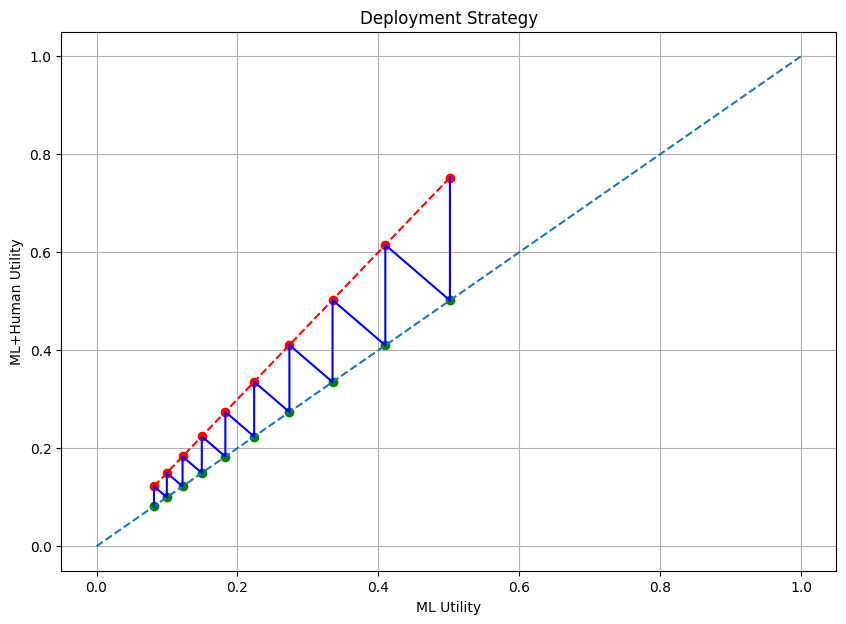

In [68]:
env.render()
#cost of collecting data
#cost of deployment
#optimize objective max beta^-t utility - cost of deployment
#different ccfs
#different noise in data